# Predicting the patient's eligibility to a given target drug 30 days in advance 

Data Description -
The folder shared with you contains following four files
1) Train.parquet - Dataset to be used for training
2) Test.parquet - Dataset to be used for testing
3) Sample_submission.csv - a sample csv file showing how the output should be
4) Final_submission.csv - csv file to be submitted finally after generating the output

### Brief Description of the Dataset -
The dataset in question contains a comprehensive collection of electronic
health records belonging to patients who have been diagnosed with a specific
disease. These health records comprise a detailed log of every aspect of the
patients' medical history, including all diagnoses, symptoms, prescribed drug
treatments, and medical tests that they have undergone. Each row represents a
healthcare record/medical event for a patient and it includes a timestamp for each
entry/event, thereby allowing for a chronological view of the patient's medical history
The Data has mainly three columns
1) Patient-Uid - Unique Alphanumeric Identifier for a patient
2) Date - Date when patient encountered the event.
3) Incident - This columns describes which event occurred on the day.

In [2]:
import pandas as pd

train_data = pd.read_parquet("Structured_Data_Assignment/train.parquet")
train_data.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


Above Table represents a patient journey for patient a0db1e73-1c7c-11ec-ae39-16262ee38c7f
This patient took drug of type 7 on 2015-09-2022, then the patient had a symptom of type 2 on
2018-04-13, and then again the patient took drug of type 7 on 2018-05-02 and so on

In [3]:
train_data.shape

(3220868, 3)

In [4]:
counts = train_data['Patient-Uid'].value_counts()
counts.shape

(27033,)

There are total 27K unique patients present in train.parquet
Similar to drug_type_7, there is also drug called ‘Target Drug”, this drug is of interest for the
assignment, there are total 9K patients in train.parquet who have taken “Target Drug” atleast
once.

In [5]:
counts = train_data['Incident'].value_counts()
counts.shape

(57,)

In [6]:
train_indexes= counts.index
print(train_indexes)

Index(['DRUG_TYPE_6', 'DRUG_TYPE_1', 'PRIMARY_DIAGNOSIS', 'DRUG_TYPE_0',
       'DRUG_TYPE_7', 'DRUG_TYPE_2', 'DRUG_TYPE_8', 'DRUG_TYPE_3',
       'TEST_TYPE_1', 'TARGET DRUG', 'DRUG_TYPE_9', 'DRUG_TYPE_5',
       'DRUG_TYPE_11', 'SYMPTOM_TYPE_0', 'SYMPTOM_TYPE_6', 'TEST_TYPE_0',
       'SYMPTOM_TYPE_7', 'DRUG_TYPE_10', 'DRUG_TYPE_14', 'DRUG_TYPE_13',
       'DRUG_TYPE_12', 'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_1', 'SYMPTOM_TYPE_2',
       'TEST_TYPE_3', 'SYMPTOM_TYPE_5', 'SYMPTOM_TYPE_8', 'TEST_TYPE_2',
       'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_29',
       'SYMPTOM_TYPE_16', 'DRUG_TYPE_15', 'SYMPTOM_TYPE_9', 'DRUG_TYPE_4',
       'SYMPTOM_TYPE_4', 'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_12',
       'SYMPTOM_TYPE_11', 'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_13', 'DRUG_TYPE_16',
       'TEST_TYPE_4', 'SYMPTOM_TYPE_18', 'SYMPTOM_TYPE_21', 'SYMPTOM_TYPE_22',
       'SYMPTOM_TYPE_19', 'DRUG_TYPE_17', 'TEST_TYPE_5', 'SYMPTOM_TYPE_24',
       'SYMPTOM_TYPE_26', 'SYMPTOM_TYPE_23', 'SYMPTOM_TYPE_

In [7]:
test_data = pd.read_parquet("Structured_Data_Assignment/test.parquet")
test_data.head()

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0


In [8]:
counts = test_data['Patient-Uid'].value_counts()
counts.shape

(11482,)

In [9]:
counts = test_data['Incident'].value_counts()
counts.shape

(55,)

In [10]:
test_indexes= counts.index
print(test_indexes)

Index(['DRUG_TYPE_6', 'DRUG_TYPE_1', 'PRIMARY_DIAGNOSIS', 'DRUG_TYPE_7',
       'DRUG_TYPE_0', 'DRUG_TYPE_2', 'DRUG_TYPE_8', 'DRUG_TYPE_3',
       'TEST_TYPE_1', 'DRUG_TYPE_9', 'DRUG_TYPE_5', 'DRUG_TYPE_11',
       'SYMPTOM_TYPE_0', 'SYMPTOM_TYPE_6', 'TEST_TYPE_0', 'SYMPTOM_TYPE_7',
       'SYMPTOM_TYPE_5', 'DRUG_TYPE_14', 'DRUG_TYPE_10', 'DRUG_TYPE_13',
       'SYMPTOM_TYPE_1', 'DRUG_TYPE_12', 'SYMPTOM_TYPE_2', 'TEST_TYPE_3',
       'SYMPTOM_TYPE_8', 'TEST_TYPE_2', 'SYMPTOM_TYPE_14', 'DRUG_TYPE_4',
       'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_29',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_16', 'DRUG_TYPE_15', 'SYMPTOM_TYPE_4',
       'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_11',
       'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_13', 'DRUG_TYPE_16', 'TEST_TYPE_4',
       'SYMPTOM_TYPE_18', 'SYMPTOM_TYPE_22', 'SYMPTOM_TYPE_21',
       'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_24', 'TEST_TYPE_5', 'SYMPTOM_TYPE_20',
       'SYMPTOM_TYPE_23', 'SYMPTOM_TYPE_26', 'SYMPTOM_TYPE_28', 'DRUG_T

Lets check if there are drugs in the train data different from test data and vice versa

In [11]:
print(set(train_indexes)-set(test_indexes))

{'DRUG_TYPE_18', 'TARGET DRUG'}


In [12]:
print(set(test_indexes)-set(train_indexes))

set()


So here we can see that there are no extra new drugs in the test data which are not present in the train data which is good thing.

### Lets bring all the data for each of the patients in a single row as they are distributed across the whole dataset.

In [13]:
# Converting the 'Date' column to datetime
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Sorting the DataFrame by 'patient_id' and 'Date'
train_data.sort_values(by=['Patient-Uid', 'Date'], inplace=True)

#There is space in the name which will create problems in the future sow e replace it with '_'
train_data['Incident'] = train_data['Incident'].replace('TARGET DRUG', 'TARGET_DRUG')

# Grouping by 'patient_id' and aggregating 'Incident' column
grouped = train_data.groupby('Patient-Uid')['Incident'].apply(lambda x: ' '.join(x)).reset_index()

# Renaming the aggregated column
grouped.rename(columns={'Incident': 'Incident_text'}, inplace=True)

# Creating a new column 'Class_Label' based on 'Incident' values
grouped['Class_Label'] = grouped['Incident_text'].apply(lambda x: 1 if 'TARGET_DRUG' in x.split() else 0)

grouped.head()

,Patient-Uid,Incident_text,Class_Label
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,DRUG_TYPE_7 SYMPTOM_TYPE_2 DRUG_TYPE_7 SYMPTOM...,0
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,DRUG_TYPE_0 DRUG_TYPE_2 DRUG_TYPE_0 PRIMARY_DI...,0
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,DRUG_TYPE_0 PRIMARY_DIAGNOSIS DRUG_TYPE_7 DRUG...,0
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,DRUG_TYPE_0 DRUG_TYPE_7 DRUG_TYPE_2 PRIMARY_DI...,0
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,DRUG_TYPE_1 TEST_TYPE_1 SYMPTOM_TYPE_8 DRUG_TY...,0


# Problem Statement
 The development of drugs is critical in providing therapeutic options
for patients suffering from chronic and terminal illnesses. “Target Drug”, in particular,
is designed to enhance the patient's health and well-being without causing
dependence on other medications that could potentially lead to severe and
life-threatening side effects. These drugs are specifically tailored to treat a particular
disease or condition, offering a more focused and effective approach to treatment,
while minimising the risk of harmful reactions.
The objective is to develop a predictive model which will predict
whether a patient will be eligible*** for “Target Drug” or not in next 30 days. Knowing
if the patient is eligible or not will help physician treating the patient make informed
decision on the which treatments to give.
*** - It is given that a patient is considered eligible for a particular drug when they have taken their
first prescription for that drug.


### Analysis for the 30 days

* Here it is said that some patients have taken the target drug, hence they are classified as the positive class. Now , we need to predict before 30 days whether the patient is eleigible for that drug or not.
* For that to happen, we have to mask the record ( remove ) the records for the patients who have taken that "target_drug", after taking the drug, because we need the data only up to the time 30 days before taking the target_drug, so that we can effectively train our model to predict it will be taken without actually knowing that the patient has taken the drug directly.

In [14]:
grouped_patient = train_data.groupby("Patient-Uid")
grouped_patient.head()

,Patient-Uid,Date,Incident
1750087,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,DRUG_TYPE_7
1473893,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,SYMPTOM_TYPE_2
1387922,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,DRUG_TYPE_7
223191,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,SYMPTOM_TYPE_0
557302,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_9
...,...,...,...
19365046,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-04-21,DRUG_TYPE_6
19365755,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-06-26,DRUG_TYPE_1
20630372,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-07-16,DRUG_TYPE_6
22527539,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2015-07-16,DRUG_TYPE_5


Lets check the dates of the patients records and remove those till 30 days before taking the "TARGET_DRUG".

* This is done for the positive class patients only and not for the negative class patients

Procedure:
1. Here we are iterating throught the dates of the patient records and checking if he has taken the "TARGET_DRUG".
2. If they have taken it , note down the index of the date( or drug ) taken before 30 days of the date of the "TARGET_DRUG".
3. Now all these position indexes are stored in the list called "cutoff_index_list"
4. During the analysis we have encountered a patient, who has takent the "TARGET_DRUG" before 30 days itself like with in 6 days of the joining the clinic or atleast when the records are started on their name.
5. Finally we also note down those patients-id also to remove them. As their data is of no use and are trated as outliers.

In [15]:

count=0 #This is to keep track of the patients who have taken the TARGET_DRUG

#List to store the index position of the day till we take the history since the beginning of the patient's tenure
cutoff_index_list=[]

#This is to keep track of the indexes of the patients who have taken the 'drug'
index_of_target=[]

#This is to keep track of the outlier patients
count_2=0

#The patient id's of the outlier patients are stored here
index_of_immediate_patients=[]

#start iterating thorugh the dataset patient wise.
for group_name, group_data in grouped_patient:

    #start iterating through the history of each patient
    for i in range(len(group_data)):

        #catch those patients who have taken the drug
        if group_data["Incident"].iloc[i]=="TARGET_DRUG":
            index_of_target.append(i) #store their index 
            count+=1
            temp = i #This variable keep track of the date before 30 days of the drug taken

            #Now if the date just before target_drug is within 30 days , check the date before it till we go 1 month in the past
            while (group_data["Date"].iloc[i]-group_data["Date"].iloc[temp-1]).days < 30:
                temp-=1 #accordigly keep track how much we are going back

                #Some times we reach the beginning of the records where index =0, and the record of the patient is started and that too within the month
                #This is the outlier, so we note down the index of that patient
                if temp==0:
                    count_2+=1
                    index_of_immediate_patients.append(group_name)
                    break
            #Store the value of index position for the date in this list
            cutoff_index_list.append(temp)
            break
        #Here this takes care of the indexes for all the patients without worring about the positive and negative etc.
        #Because all the dates are preserved for the negative patients without cutting off.
        if i == len(group_data)-1: # this will be executed if the above condition is not triggered which means for negative patients only.
            #make the cutoff index for them as the length of the whole history so that it wont be cutoff at all.
            cutoff_index_list.append(len(group_data))

#finnaly print some useful findings
print("patients who are administered TARGET_DRUG :", count)

print("patients who are administered TARGET_DRUG within 30 days of given records itself :", count_2)

patients who are administered TARGET_DRUG : 9374
patients who are administered TARGET_DRUG within 30 days of given records itself : 1


There is one patient whose data won't be that useful because the data is such that he came to the hosspital with the disease itself, so that's why TARGET_DRUG is given to him within a month (30days), since we want the data before 30 days , this patient's information is not that useful, so we will remove that patient from the record to train. Treating him/her as OUTLIER.

In [16]:
#This is the OUTLIER patient index that we have found out
index_of_immediate_patients

['a0ee64e1-1c7c-11ec-becd-16262ee38c7f']

In [17]:
print("Number of patients : ",grouped_patient.ngroups)

Number of patients :  27033


In [18]:
#Add this index information to the dataset for further analysis
grouped['cutoff_indices']=cutoff_index_list
grouped.head()

,Patient-Uid,Incident_text,Class_Label,cutoff_indices
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,DRUG_TYPE_7 SYMPTOM_TYPE_2 DRUG_TYPE_7 SYMPTOM...,0,96
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,DRUG_TYPE_0 DRUG_TYPE_2 DRUG_TYPE_0 PRIMARY_DI...,0,109
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,DRUG_TYPE_0 PRIMARY_DIAGNOSIS DRUG_TYPE_7 DRUG...,0,98
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,DRUG_TYPE_0 DRUG_TYPE_7 DRUG_TYPE_2 PRIMARY_DI...,0,109
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,DRUG_TYPE_1 TEST_TYPE_1 SYMPTOM_TYPE_8 DRUG_TY...,0,244


In [19]:
grouped.shape

(27033, 4)

This is the number of patients after removal of the outlier

In [20]:
grouped=grouped[grouped['Patient-Uid']!=index_of_immediate_patients[0]]
grouped.shape

(27032, 4)

### Now remove the history after the target_drug administration with the code below.

In [21]:
# Grouping the DataFrame by 'group_column'
grouped = grouped.groupby('Patient-Uid')

# Function to process and update the text
# Now we store the updated patient histories in a seperate column named "text_column" 
def process_text(group):
    group['text_column'] = group.apply(lambda row: ' '.join(row['Incident_text'].split()[:row['cutoff_indices']]), axis=1)
    return group

# Apply the function to each group and reassemble
updated_groups = grouped.apply(process_text)

# Print the updated DataFrame
updated_groups

C:\Users\dragon\AppData\Local\Temp\ipykernel_16964\863178322.py:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  updated_groups = grouped.apply(process_text)


,Patient-Uid,Incident_text,Class_Label,cutoff_indices,text_column
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,DRUG_TYPE_7 SYMPTOM_TYPE_2 DRUG_TYPE_7 SYMPTOM...,0,96,DRUG_TYPE_7 SYMPTOM_TYPE_2 DRUG_TYPE_7 SYMPTOM...
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,DRUG_TYPE_0 DRUG_TYPE_2 DRUG_TYPE_0 PRIMARY_DI...,0,109,DRUG_TYPE_0 DRUG_TYPE_2 DRUG_TYPE_0 PRIMARY_DI...
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,DRUG_TYPE_0 PRIMARY_DIAGNOSIS DRUG_TYPE_7 DRUG...,0,98,DRUG_TYPE_0 PRIMARY_DIAGNOSIS DRUG_TYPE_7 DRUG...
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,DRUG_TYPE_0 DRUG_TYPE_7 DRUG_TYPE_2 PRIMARY_DI...,0,109,DRUG_TYPE_0 DRUG_TYPE_7 DRUG_TYPE_2 PRIMARY_DI...
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,DRUG_TYPE_1 TEST_TYPE_1 SYMPTOM_TYPE_8 DRUG_TY...,0,244,DRUG_TYPE_1 TEST_TYPE_1 SYMPTOM_TYPE_8 DRUG_TY...
...,...,...,...,...,...
27028,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,DRUG_TYPE_6 DRUG_TYPE_0 DRUG_TYPE_6 DRUG_TYPE_...,1,82,DRUG_TYPE_6 DRUG_TYPE_0 DRUG_TYPE_6 DRUG_TYPE_...
27029,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,DRUG_TYPE_6 DRUG_TYPE_8 DRUG_TYPE_1 DRUG_TYPE_...,1,82,DRUG_TYPE_6 DRUG_TYPE_8 DRUG_TYPE_1 DRUG_TYPE_...
27030,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,DRUG_TYPE_6 DRUG_TYPE_1 DRUG_TYPE_9 DRUG_TYPE_...,1,107,DRUG_TYPE_6 DRUG_TYPE_1 DRUG_TYPE_9 DRUG_TYPE_...
27031,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,DRUG_TYPE_9 SYMPTOM_TYPE_7 DRUG_TYPE_2 DRUG_TY...,1,120,DRUG_TYPE_9 SYMPTOM_TYPE_7 DRUG_TYPE_2 DRUG_TY...


In [22]:
#check if the GPU is ready
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


### Train-validation split

* Here till now we have no interation between the patients, but we have analysed and featurised independently for each patient.
* But now we have to tokenize the history of the patients with the help of tensorflow tokenizer because we are planning to use LSTM , because to find the time based patterns in the history arranged wrt date.
* For this type of encoding, we need to split the dataa first and then proceed to avoid data leakage.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import numpy as np 

X = np.array(updated_groups['text_column'].tolist())
y = np.array(updated_groups['Class_Label'])

#Split the data with the equal proportions of +ve and -ve classes in train and test as there is a little imbalance present.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [24]:
#While tokenizing maake sure that we are keeping filters as none,, because if we dont put it, then it will remove the underscores in the drugnames too.
tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='',lower=False, split=" ")

# Fitting tokenizer on the text data
tokenizer.fit_on_texts(X_train)

# Encoding the text and applying front-side padding
X_train_encoded = tokenizer.texts_to_sequences(X_train)
#apply pre-padding, as we are going to use LSTM 
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train_encoded, padding='pre')

Final_X_train = X_train_padded.tolist()

# Displaying the final dataset
print(Final_X_train[:5])

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [25]:
print(len(Final_X_train[0]))

1645


In [26]:
#Get the maximum length of the padded text so that we should pad the validation data also to the same length
pad_length = 1645

In [27]:
# Encoding the text and applying front-side padding for the validation data
X_val_encoded = tokenizer.texts_to_sequences(X_val)
X_val_padded = tf.keras.preprocessing.sequence.pad_sequences(X_val_encoded, padding='pre', maxlen=1645)

Final_X_val = X_val_padded.tolist()

In [28]:
print(len(Final_X_val[0]))

1645


Lets check once if we have tokenized properly

In [29]:
tokenizer.word_index

{'DRUG_TYPE_6': 1,
 'DRUG_TYPE_1': 2,
 'PRIMARY_DIAGNOSIS': 3,
 'DRUG_TYPE_0': 4,
 'DRUG_TYPE_7': 5,
 'DRUG_TYPE_2': 6,
 'DRUG_TYPE_8': 7,
 'DRUG_TYPE_3': 8,
 'TEST_TYPE_1': 9,
 'DRUG_TYPE_9': 10,
 'DRUG_TYPE_5': 11,
 'DRUG_TYPE_11': 12,
 'SYMPTOM_TYPE_0': 13,
 'SYMPTOM_TYPE_6': 14,
 'TEST_TYPE_0': 15,
 'SYMPTOM_TYPE_7': 16,
 'DRUG_TYPE_14': 17,
 'DRUG_TYPE_10': 18,
 'DRUG_TYPE_13': 19,
 'DRUG_TYPE_12': 20,
 'SYMPTOM_TYPE_1': 21,
 'SYMPTOM_TYPE_2': 22,
 'TEST_TYPE_3': 23,
 'SYMPTOM_TYPE_5': 24,
 'SYMPTOM_TYPE_8': 25,
 'SYMPTOM_TYPE_14': 26,
 'TEST_TYPE_2': 27,
 'SYMPTOM_TYPE_29': 28,
 'SYMPTOM_TYPE_15': 29,
 'SYMPTOM_TYPE_10': 30,
 'DRUG_TYPE_4': 31,
 'SYMPTOM_TYPE_9': 32,
 'SYMPTOM_TYPE_16': 33,
 'SYMPTOM_TYPE_3': 34,
 'SYMPTOM_TYPE_4': 35,
 'DRUG_TYPE_15': 36,
 'SYMPTOM_TYPE_12': 37,
 'SYMPTOM_TYPE_11': 38,
 'SYMPTOM_TYPE_17': 39,
 'SYMPTOM_TYPE_13': 40,
 'TEST_TYPE_4': 41,
 'DRUG_TYPE_16': 42,
 'SYMPTOM_TYPE_18': 43,
 'SYMPTOM_TYPE_21': 44,
 'SYMPTOM_TYPE_22': 45,
 'SYMPTOM_TYPE_19'

There are 56 tokens on total, which means 56 types of different drugs, tests and symptoms. 
NOTE: Here we have observe that there is no TARGET_DRUG which means we have successfully going in the right direction without any mistakes.

In [30]:
len(tokenizer.word_index)

56

### MODEL BULDING

Create useful callbacks 1st.
* Since the CUDA version for windows tensorflow doesnot yet support the F1-score , we have to define our own with the custom callback to measure it as shown below by modifying the loss_history callback of the original tensorflow.
* All the other callbacks like early stopping, model saving check point and also tensor booard for visualization are also added

In [31]:
import tensorflow as tf
import os
import datetime
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from sklearn.metrics import f1_score

class LossHistory(tf.keras.callbacks.Callback):
    
    def __init__(self,validation_data):
      self.x_test = validation_data[0]
      self.y_test= validation_data[1]
      
    def on_train_begin(self, logs={}):
        ## on begin of training, we are creating a instance varible called history
        ## it is a dict with keys [loss, acc, val_loss, val_acc]
        self.history={'loss': [],'accuracy': [],'val_loss': [],'val_accuracy': [],'val_f1': []}
        
    def on_epoch_end(self, epoch, logs={}):
        ## on end of each epoch, we will get logs and update the self.history dict
        self.history['loss'].append(logs.get('loss'))
        self.history['accuracy'].append(logs.get('accuracy'))
      
        if logs.get('val_loss', -1) != -1:
            self.history['val_loss'].append(logs.get('val_loss'))
        if logs.get('val_accuracy', -1) != -1:
            self.history['val_accuracy'].append(logs.get('val_accuracy'))
        
        # we can get a list of all predicted values at the end of the epoch
        # we can use these predicted value and the true values to calculate any custom evaluation score if it is needed for our model
        y_pred= self.model.predict(self.x_test)
        y_label_pred= [1 if d>=0.5 else 0 for d in y_pred]
        
        #we can also calculate predefined metrics such as precison, recall, etc. using callbacks 
        f1 = f1_score(self.y_test, y_label_pred)
        
        self.history['val_f1'].append(f1)
    
        print('val_f1_score: ',np.round(f1,5))
        
history_own = LossHistory(validation_data=[X_val_padded,y_val])

#Add the required call backs
log_dir = os.path.join("logs",'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)
earlystop = EarlyStopping(monitor="val_loss",mode="auto",patience=2,verbose=1)
checkpt = ModelCheckpoint(monitor="val_loss",mode="auto",filepath='model_1.hdf5',verbose=1,save_best_only=True)

#Create a list of all the callbacks to pass them to the model while training
callback_list = [earlystop, tensorboard_callback,checkpt, history_own]

Finally design the model architecture

In [32]:
from keras.models import Model

#Define the input layer
input_layer=tf.keras.layers.Input(shape=len(X_train_padded[0]))

#Define the LSTM layer along with the embedding layer
embedding=tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=64, input_length=len(X_train_padded[0]))(input_layer)
lstm_layer = tf.keras.layers.LSTM(32, return_sequences=True)(embedding)

#flatten the output to connect more dense layers
flat_1=tf.keras.layers.Flatten()(lstm_layer)

#add 2 dense layers along with dropouts to avoid overfitting
Dense_1=tf.keras.layers.Dense(128,activation='relu', kernel_initializer=tf.keras.initializers.HeNormal())(flat_1)
Drop_out=tf.keras.layers.Dropout(0.5)(Dense_1)
Dense_2=tf.keras.layers.Dense(64,activation='relu', kernel_initializer=tf.keras.initializers.HeNormal())(Drop_out)

#Finally define the output layer for classification
output_layer=tf.keras.layers.Dense(1, activation='sigmoid')(Dense_2)

#Create the model architecture with the above defined layers and check how many parameters are trainable
model_lstm = Model(inputs=input_layer, outputs=output_layer)
model_lstm.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1645)]            0         
                                                                 
 embedding (Embedding)       (None, 1645, 64)          3648      
                                                                 
 lstm (LSTM)                 (None, 1645, 32)          12416     
                                                                 
 flatten (Flatten)           (None, 52640)             0         
                                                                 
 dense (Dense)               (None, 128)               6738048   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256  

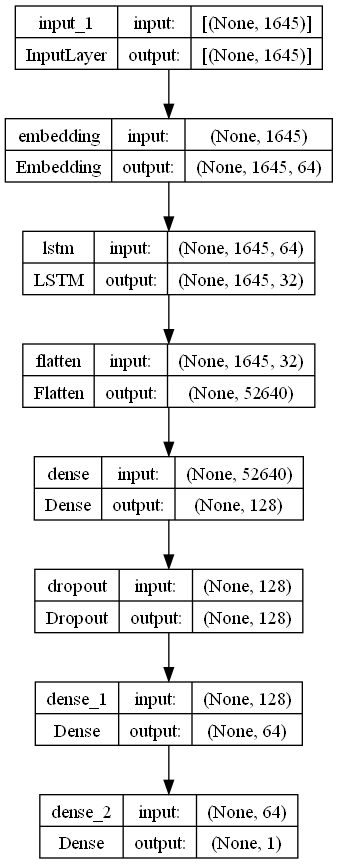

In [33]:
#plot the model and save the model image
import keras 
dot_img_file = 'model_0.png'
keras.utils.vis_utils.plot_model(model_lstm, to_file=dot_img_file, show_shapes=True)

In [108]:
# Compiling the model wrt binary classification
model_lstm.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#train the model
model_lstm.fit(X_train_padded, y_train, epochs=20, validation_data = (X_val_padded,y_val), callbacks=callback_list, batch_size=16)

Epoch 1/20
1352/1352 [==============================] - ETA: 0s - loss: 0.4893 - accuracy: 0.7642
Epoch 1: val_loss improved from inf to 0.40754, saving model to model_1.hdf5
169/169 [==============================] - 8s 44ms/step
val_f1_score:  0.72218
1352/1352 [==============================] - 160s 113ms/step - loss: 0.4893 - accuracy: 0.7642 - val_loss: 0.4075 - val_accuracy: 0.8149
Epoch 2/20
1352/1352 [==============================] - ETA: 0s - loss: 0.4235 - accuracy: 0.7998
Epoch 2: val_loss improved from 0.40754 to 0.40604, saving model to model_1.hdf5
169/169 [==============================] - 8s 44ms/step
val_f1_score:  0.67525
1352/1352 [==============================] - 147s 109ms/step - loss: 0.4235 - accuracy: 0.7998 - val_loss: 0.4060 - val_accuracy: 0.8088
Epoch 3/20
1352/1352 [==============================] - ETA: 0s - loss: 0.3983 - accuracy: 0.8116
Epoch 3: val_loss improved from 0.40604 to 0.39380, saving model to model_1.hdf5
169/169 [==========================

In [109]:
y_pred_val = model_lstm.predict(X_val_padded)
y_pred_int_val = [1 if d>=0.5 else 0 for d in y_pred_val]

print(f1_score(y_val,y_pred_int_val))

169/169 [==============================] - 7s 42ms/step
0.7673684210526315


### Initial F1-score of the model is found to be 0.767

In [120]:
%tensorboard --logdir logs/fits

UsageError: Line magic function `%tensorboard` not found.


### Tensorboard graphs for reference

* The Orange line --> Train score and loss <br>
* The Blue line --> Validation score and loss <br>

<img src='https://imgur.com/a/UuqkSY9.jpg'>

### Finally save the model for later use

In [110]:
model_lstm.save("model_1_high_f1.hdf5",save_format='hdf5')

## Feature Engineering to improve the score

Here we are designing 2 kinds of features:
1. Time based feature by taking in to consideration the gap between the successive tests or drug doses or symptom records. Because they may contain clue about the onset of the disease which leads to the TARGET_DRUG.
2. Frequency based feature which is the how many times a particular symptom or the drug has been taken by patient, which can help in  differentiating the positive and negative patients.

In [111]:
#First we will remove the 1 patient from the train data

train_data=train_data[train_data['Patient-Uid']!='a0ee64e1-1c7c-11ec-becd-16262ee38c7f']

groups_2= train_data.groupby('Patient-Uid')

print(groups_2.ngroups)

27032


#### 1. Time based feature: Gap between consecutive test or drug administered intervals in days
* Here we also pad the vectors obtained by noting the gaps for each patient , so that we avoid using the encoder module and can directly featurize them.

In [127]:
#This is used to build time based features as showen below
max_length = max(cutoff_index_list)
print(max_length)

1645


In [155]:
import numpy as np

#This is the access the exact cutoff date index for each patient
count=0

#List to store the final gaps in days in the form of list of lists
Time_based_features=[]

#Iterate through the records of each patient
for group_name, group_data in groups_2:

    #list to store the gap history of each patient
    temp_list=[]

    #Loop thorugh the patient history
    for j in range(updated_groups['cutoff_indices'].iloc[count]-1):
            #take the difference between the consecutive dates in days
            temp_list.append((group_data["Date"].iloc[j+1]-group_data["Date"].iloc[j]).days)
    #pad the gap vector with the max_length which we have seen above 
    temp_list.extend(list(np.zeros(shape=max_length-len(temp_list),dtype=int)))

    #finally add all the patient gap histories in to a single list
    Time_based_features.append(temp_list)
    count+=1

#check the shape of the obtained features
print(len(Time_based_features),len(Time_based_features[0]))

27032 1645


In [172]:
#add them to the main dataset
updated_groups['Time_based_features']=Time_based_features

In [202]:
updated_groups = updated_groups.rename(columns={'text_column':'Incident_text_till_target_drug'})
updated_groups.head()

,Patient-Uid,Incident_text,Class_Label,cutoff_indices,Incident_text_till_target_drug,Time_based_features
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,DRUG_TYPE_7 SYMPTOM_TYPE_2 DRUG_TYPE_7 SYMPTOM...,0,96,DRUG_TYPE_7 SYMPTOM_TYPE_2 DRUG_TYPE_7 SYMPTOM...,"[934, 19, 205, 0, 0, 0, 0, 1, 0, 8, 0, 53, 6, ..."
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,DRUG_TYPE_0 DRUG_TYPE_2 DRUG_TYPE_0 PRIMARY_DI...,0,109,DRUG_TYPE_0 DRUG_TYPE_2 DRUG_TYPE_0 PRIMARY_DI...,"[2, 0, 32, 1, 0, 1, 0, 0, 0, 0, 59, 0, 0, 8, 3..."
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,DRUG_TYPE_0 PRIMARY_DIAGNOSIS DRUG_TYPE_7 DRUG...,0,98,DRUG_TYPE_0 PRIMARY_DIAGNOSIS DRUG_TYPE_7 DRUG...,"[0, 0, 0, 0, 1, 13, 0, 0, 0, 0, 0, 0, 48, 51, ..."
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,DRUG_TYPE_0 DRUG_TYPE_7 DRUG_TYPE_2 PRIMARY_DI...,0,109,DRUG_TYPE_0 DRUG_TYPE_7 DRUG_TYPE_2 PRIMARY_DI...,"[0, 62, 0, 17, 9, 0, 46, 48, 44, 20, 5, 0, 0, ..."
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,DRUG_TYPE_1 TEST_TYPE_1 SYMPTOM_TYPE_8 DRUG_TY...,0,244,DRUG_TYPE_1 TEST_TYPE_1 SYMPTOM_TYPE_8 DRUG_TY...,"[10, 8, 10, 6, 17, 0, 3, 2, 2, 5, 0, 0, 5, 7, ..."


### Save the dataframe for future use

In [203]:
updated_groups.to_csv('processed_dataframe_1.csv', index=False)

In [1]:
import pandas as pd
updated_groups=pd.read_csv('processed_dataframe_1.csv')

In [2]:
updated_groups.head()

,Patient-Uid,Incident_text,Class_Label,cutoff_indices,Incident_text_till_target_drug,Time_based_features
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,DRUG_TYPE_7 SYMPTOM_TYPE_2 DRUG_TYPE_7 SYMPTOM...,0,96,DRUG_TYPE_7 SYMPTOM_TYPE_2 DRUG_TYPE_7 SYMPTOM...,"[934, 19, 205, 0, 0, 0, 0, 1, 0, 8, 0, 53, 6, ..."
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,DRUG_TYPE_0 DRUG_TYPE_2 DRUG_TYPE_0 PRIMARY_DI...,0,109,DRUG_TYPE_0 DRUG_TYPE_2 DRUG_TYPE_0 PRIMARY_DI...,"[2, 0, 32, 1, 0, 1, 0, 0, 0, 0, 59, 0, 0, 8, 3..."
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,DRUG_TYPE_0 PRIMARY_DIAGNOSIS DRUG_TYPE_7 DRUG...,0,98,DRUG_TYPE_0 PRIMARY_DIAGNOSIS DRUG_TYPE_7 DRUG...,"[0, 0, 0, 0, 1, 13, 0, 0, 0, 0, 0, 0, 48, 51, ..."
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,DRUG_TYPE_0 DRUG_TYPE_7 DRUG_TYPE_2 PRIMARY_DI...,0,109,DRUG_TYPE_0 DRUG_TYPE_7 DRUG_TYPE_2 PRIMARY_DI...,"[0, 62, 0, 17, 9, 0, 46, 48, 44, 20, 5, 0, 0, ..."
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,DRUG_TYPE_1 TEST_TYPE_1 SYMPTOM_TYPE_8 DRUG_TY...,0,244,DRUG_TYPE_1 TEST_TYPE_1 SYMPTOM_TYPE_8 DRUG_TY...,"[10, 8, 10, 6, 17, 0, 3, 2, 2, 5, 0, 0, 5, 7, ..."


### Now perform the train test split

In [3]:
from sklearn.model_selection import train_test_split
X = updated_groups.drop(columns='Class_Label')
y = updated_groups['Class_Label']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [4]:
X_train.head()

,Patient-Uid,Incident_text,cutoff_indices,Incident_text_till_target_drug,Time_based_features
26884,a0f0b8aa-1c7c-11ec-bceb-16262ee38c7f,TEST_TYPE_1 DRUG_TYPE_0 TEST_TYPE_1 TEST_TYPE_...,50,TEST_TYPE_1 DRUG_TYPE_0 TEST_TYPE_1 TEST_TYPE_...,"[23, 217, 4, 11, 0, 0, 21, 0, 2, 24, 42, 8, 76..."
3139,a0deedc9-1c7c-11ec-997a-16262ee38c7f,DRUG_TYPE_0 DRUG_TYPE_6 DRUG_TYPE_1 DRUG_TYPE_...,102,DRUG_TYPE_0 DRUG_TYPE_6 DRUG_TYPE_1 DRUG_TYPE_...,"[60, 0, 0, 25, 0, 1, 1, 6, 0, 0, 0, 0, 0, 0, 2..."
25383,a0ef9cc9-1c7c-11ec-85ea-16262ee38c7f,DRUG_TYPE_7 DRUG_TYPE_7 DRUG_TYPE_7 DRUG_TYPE_...,74,DRUG_TYPE_7 DRUG_TYPE_7 DRUG_TYPE_7 DRUG_TYPE_...,"[89, 63, 35, 27, 27, 24, 148, 13, 0, 56, 75, 7..."
7260,a0e2018f-1c7c-11ec-acf5-16262ee38c7f,DRUG_TYPE_6 DRUG_TYPE_6 PRIMARY_DIAGNOSIS TEST...,77,DRUG_TYPE_6 DRUG_TYPE_6 PRIMARY_DIAGNOSIS TEST...,"[41, 16, 0, 1, 44, 38, 0, 5, 10, 34, 48, 0, 5,..."
6220,a0e13d1e-1c7c-11ec-8138-16262ee38c7f,DRUG_TYPE_2 PRIMARY_DIAGNOSIS DRUG_TYPE_6 DRUG...,134,DRUG_TYPE_2 PRIMARY_DIAGNOSIS DRUG_TYPE_6 DRUG...,"[232, 93, 0, 0, 0, 0, 0, 36, 24, 39, 23, 18, 1..."


In [5]:
import tensorflow as tf

tokenizer = tf.keras.preprocessing.text.Tokenizer(filters='',lower=False, split=" ")

# Fitting tokenizer on the text data
tokenizer.fit_on_texts(X_train['Incident_text_till_target_drug'].values)

# Encoding the text and applying front-side padding
X_train_encoded = tokenizer.texts_to_sequences(X_train['Incident_text_till_target_drug'].values)
X_train_padded = tf.keras.preprocessing.sequence.pad_sequences(X_train_encoded, padding='pre')

# Displaying the final dataset shape
print(X_train_padded.shape)

(21625, 1645)


Save the tokenizer for the later use for the test data

In [34]:
import joblib
# Define the path where you want to save the vectorizer
Tokenizer_path = 'tokenizer.pkl'

# Save the vectorizer to a file using joblib
joblib.dump(tokenizer, Tokenizer_path)

print(f"Tokenizer saved to {Tokenizer_path}")

Tokenizer saved to tokenizer.pkl


In [6]:
# Encoding the text and applying front-side padding
X_val_encoded = tokenizer.texts_to_sequences(X_val['Incident_text_till_target_drug'].values)
X_val_padded = tf.keras.preprocessing.sequence.pad_sequences(X_val_encoded, padding='pre', maxlen=1645)

# Displaying the final dataset shape
print(X_val_padded.shape)

(5407, 1645)


### 2. Frequency based features: How many times a particular test or drug , is administered through out their tenure. Here to measure the frequency we have the perfect feature transform tf-idf vectorization.

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1,4), lowercase=False, max_features=1000)
vectorizer.fit(X_train['Incident_text_till_target_drug'].values) # fit has to happen only on train data

vectorizer.get_feature_names_out()[:10]

array(['DRUG_TYPE_0', 'DRUG_TYPE_0 DRUG_TYPE_0',
       'DRUG_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_0',
       'DRUG_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_0',
       'DRUG_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_1',
       'DRUG_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_2',
       'DRUG_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_6',
       'DRUG_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_0 PRIMARY_DIAGNOSIS',
       'DRUG_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_1',
       'DRUG_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_1 DRUG_TYPE_0'], dtype=object)

In [8]:
X_train_tfidf = vectorizer.transform(X_train['Incident_text_till_target_drug'].values)
X_val_tfidf = vectorizer.transform(X_val['Incident_text_till_target_drug'].values)

print(X_train_tfidf.shape, X_val_tfidf.shape)

(21625, 1000) (5407, 1000)


Save the tf-idf vectorizer for later use for test data

In [35]:
import joblib

# Define the path where you want to save the vectorizer
vectorizer_path = 'tfidf_vectorizer.pkl'

# Save the vectorizer to a file using joblib
joblib.dump(vectorizer, vectorizer_path)

print(f"TF-IDF Vectorizer saved to {vectorizer_path}")


TF-IDF Vectorizer saved to tfidf_vectorizer.pkl


## MODEL BUILDING

Here we are taking 3 kinds of inputs for the 3 kinds of features that we have at our hand.

#### PART-1 LSTM with time based arrangment of the incidents and taking only the incidents before target_drug for the positive data points

In [9]:
input_layer_1=tf.keras.layers.Input(shape=X_train_padded.shape[1], name="Input layer for LSTM based features")
embedding=tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=X_train_padded.shape[1], name="embedding_layer_1")(input_layer_1)
lstm_layer_1 = tf.keras.layers.LSTM(64, return_sequences=True, name="lstm_layer_1")(embedding)
flat_1=tf.keras.layers.Flatten(name="flatten_layer_1")(lstm_layer_1)

#### PART-2 Time based features for gaps between the drugs administered to each of the patients 

In [10]:
input_layer_2=tf.keras.layers.Input(shape=len(X_train['Time_based_features'][0]),name='Input layer for Time based features')
embedding=tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=len(X_train['Time_based_features'][0]), name='embedding_layer_2')(input_layer_2)
lstm_layer_2 = tf.keras.layers.LSTM(64, return_sequences=True, name='lstm_layer_2')(embedding)
flat_2=tf.keras.layers.Flatten(name="flatten_layer_2")(lstm_layer_2)

#### PART-3 Frequency Based features for counting how frequent each drug was administered to each patient/ symptom / diagnosis etc

In [11]:
input_layer_3 =tf.keras.layers.Input(shape=(X_train_tfidf.shape[1],), name=" Input layer for frequency based features")
dense_0= tf.keras.layers.Dense(256, activation='relu', name='Dense_for_tfidf_input')(input_layer_3)

#### PART-4 Concatenating all different input layers

In [12]:
added_tensor_1=tf.keras.layers.concatenate([flat_1,flat_2,dense_0], axis=1)

#### Finally build the model by adding additional dense layer to the concatenated layer 

In [13]:
from keras.regularizers import l2
from keras.models import Model
from keras.layers import Dense, Dropout

dense_1 = Dense(256,activation='relu',kernel_initializer=tf.keras.initializers.HeNormal(),kernel_regularizer=l2(0.0001),name='Dense_layer_after_concat')(added_tensor_1)
drop_1= Dropout(0.5, name="drop_1")(dense_1)
dense_2 = Dense(128,activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(),kernel_regularizer=l2(0.0001),name='Dense_2')(drop_1)
drop_2= Dropout(0.5, name="drop_2")(dense_2)
dense_3 = Dense(64,activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(),kernel_regularizer=l2(0.0001),name='Dense_3')(drop_2)
output = Dense(1,activation='sigmoid', name= 'output_layer_for_binary_classification')(dense_3)

In [14]:
#put all the input layers in a list format
input_layers = [input_layer_1, input_layer_2, input_layer_3]

#define the model
model= Model(inputs= input_layers, outputs=output)

#print the model summary
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input layer for LSTM based fea  [(None, 1645)]      0           []                               
 tures (InputLayer)                                                                               
                                                                                                  
 Input layer for Time based fea  [(None, 4958)]      0           []                               
 tures (InputLayer)                                                                               
                                                                                                  
 embedding_layer_1 (Embedding)  (None, 1645, 128)    7296        ['Input layer for LSTM based feat
                                                                 ures[0][0]']                 

### Model Architecture Diagram

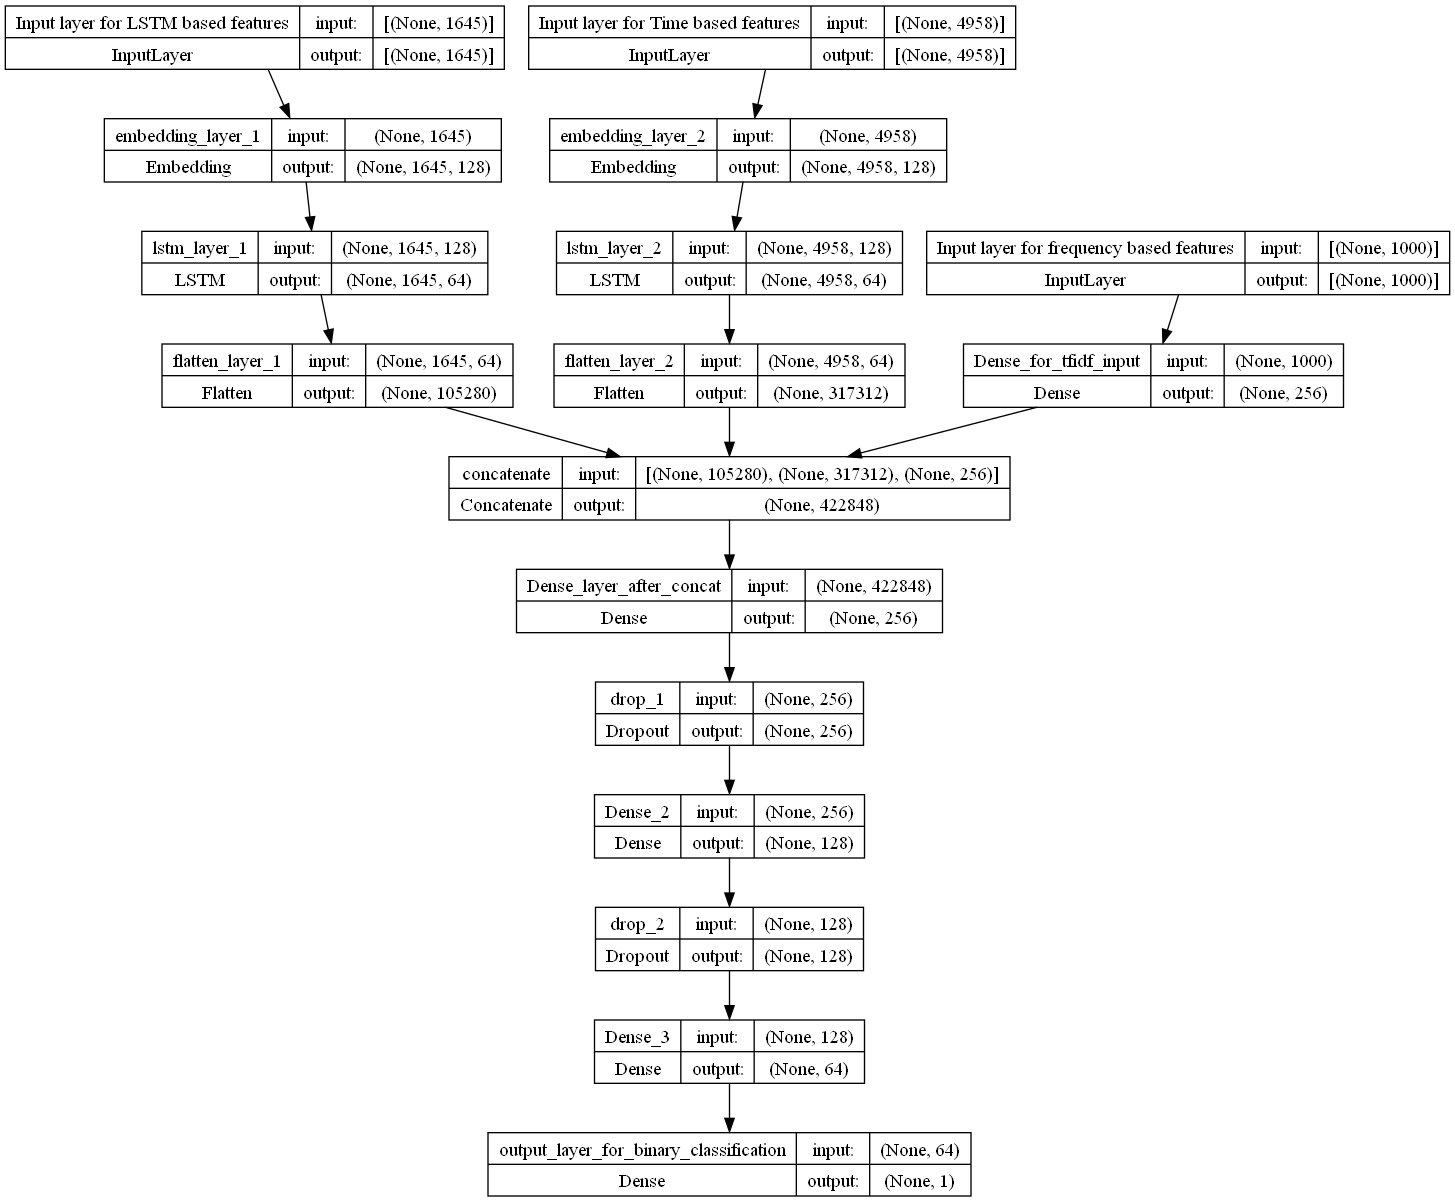

In [15]:
#plot the model and save the model image
import keras 
dot_img_file = 'model.png'
keras.utils.vis_utils.plot_model(model, to_file=dot_img_file, show_shapes=True)

### Get all the inputs to the required format

Here the format of the gap history is like lists inside in array instead of a 2d array, so this will give error with the tensorflow while training, so we convert it in to a proper 2d array.
* Importing the csv file also converted our integer list to string, so we need to convert it back

In [16]:
import numpy as np
import ast

# Convert it to the desired format
Time_based_X_train = np.array([np.array(ast.literal_eval(sublist)) for sublist in X_train['Time_based_features'].values])

# Print the new array
print(Time_based_X_train)
print(Time_based_X_train.shape)

[[ 23 217   4 ...   0   0   0]
 [ 60   0   0 ...   0   0   0]
 [ 89  63  35 ...   0   0   0]
 ...
 [  0  20  16 ...   0   0   0]
 [ 58  37 145 ...   0   0   0]
 [ 21   8  19 ...   0   0   0]]
(21625, 1645)


In [17]:
print(type(Time_based_X_train[0]))

<class 'numpy.ndarray'>


In [18]:
# Convert it to the desired format
Time_based_X_val = np.array([np.array(ast.literal_eval(sublist)) for sublist in X_val['Time_based_features'].values])

# Print the new array
print(Time_based_X_val)
print(Time_based_X_val.shape)

[[10 21 34 ...  0  0  0]
 [ 8 20 21 ...  0  0  0]
 [ 0  2  0 ...  0  0  0]
 ...
 [ 0  0  0 ...  0  0  0]
 [11 26  5 ...  0  0  0]
 [13  6  0 ...  0  0  0]]
(5407, 1645)


In [19]:
import numpy as np
#get the inputs in the required format
train_X=[X_train_padded,Time_based_X_train,X_train_tfidf.toarray()]
test_X=[X_val_padded,Time_based_X_val, X_val_tfidf.toarray()]

#get the outputs in the required format
train_y=y_train.values
test_y=y_val.values

In [20]:
train_y

array([1, 0, 1, ..., 0, 0, 1], dtype=int64)

#### Define all the necessary callbacks


In [276]:
import tensorflow as tf
import os
import datetime
from keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard

from sklearn.metrics import f1_score

class LossHistory(tf.keras.callbacks.Callback):
    
    def __init__(self,validation_data):
      self.x_test = validation_data[0]
      self.y_test= validation_data[1]
      
    def on_train_begin(self, logs={}):
        ## on begin of training, we are creating a instance varible called history
        ## it is a dict with keys [loss, acc, val_loss, val_acc]
        self.history={'loss': [],'accuracy': [],'val_loss': [],'val_accuracy': [],'val_f1': []}
        
    def on_epoch_end(self, epoch, logs={}):
        ## on end of each epoch, we will get logs and update the self.history dict
        self.history['loss'].append(logs.get('loss'))
        self.history['accuracy'].append(logs.get('accuracy'))
      
        if logs.get('val_loss', -1) != -1:
            self.history['val_loss'].append(logs.get('val_loss'))
        if logs.get('val_accuracy', -1) != -1:
            self.history['val_accuracy'].append(logs.get('val_accuracy'))
        
        # we can get a list of all predicted values at the end of the epoch
        # we can use these predicted value and the true values to calculate any custom evaluation score if it is needed for our model
        y_pred= self.model.predict(self.x_test)
        y_label_pred= [1 if d>=0.5 else 0 for d in y_pred]
        
        #we can also calculate predefined metrics such as precison, recall, etc. using callbacks 
        f1 = f1_score(self.y_test, y_label_pred)
        
        self.history['val_f1'].append(f1)
    
        print('val_f1_score: ',np.round(f1,5))
        
history_own = LossHistory(validation_data=[test_X,test_y])

#Add the required call backs
log_dir = os.path.join("logs",'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)
earlystop = EarlyStopping(monitor="val_loss",mode="auto",patience=3,verbose=1)
checkpt = ModelCheckpoint(monitor="val_loss",mode="auto",filepath='model_2.hdf5',verbose=1,save_best_only=True)

callback_list = [earlystop, tensorboard_callback,checkpt, history_own]

#### Train the model

In [277]:
opt=tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [278]:
model.fit(train_X, train_y, epochs=20, validation_data = (test_X,test_y), callbacks=callback_list, batch_size=16)

Epoch 1/20
1352/1352 [==============================] - ETA: 0s - loss: 0.5720 - accuracy: 0.8049
Epoch 1: val_loss improved from inf to 0.47463, saving model to model_2.hdf5
169/169 [==============================] - 15s 82ms/step
val_f1_score:  0.71105
1352/1352 [==============================] - 371s 267ms/step - loss: 0.5720 - accuracy: 0.8049 - val_loss: 0.4746 - val_accuracy: 0.8323
Epoch 2/20
1352/1352 [==============================] - ETA: 0s - loss: 0.4410 - accuracy: 0.8488
Epoch 2: val_loss improved from 0.47463 to 0.42038, saving model to model_2.hdf5
169/169 [==============================] - 14s 81ms/step
val_f1_score:  0.80741
1352/1352 [==============================] - 344s 254ms/step - loss: 0.4410 - accuracy: 0.8488 - val_loss: 0.4204 - val_accuracy: 0.8652
Epoch 3/20
1352/1352 [==============================] - ETA: 0s - loss: 0.3928 - accuracy: 0.8710
Epoch 3: val_loss improved from 0.42038 to 0.37427, saving model to model_2.hdf5
169/169 [========================

Reduce the learning rate and train the model further

In [279]:
opt=tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
model.fit(train_X, train_y, epochs=20, validation_data = (test_X,test_y), callbacks=callback_list, batch_size=16)

Epoch 1/20
1352/1352 [==============================] - ETA: 0s - loss: 0.1353 - accuracy: 0.9761
Epoch 1: val_loss did not improve from 0.33064
169/169 [==============================] - 15s 82ms/step
val_f1_score:  0.85816
1352/1352 [==============================] - 330s 241ms/step - loss: 0.1353 - accuracy: 0.9761 - val_loss: 0.4210 - val_accuracy: 0.9040
Epoch 2/20
1352/1352 [==============================] - ETA: 0s - loss: 0.1118 - accuracy: 0.9818
Epoch 2: val_loss did not improve from 0.33064
169/169 [==============================] - 15s 84ms/step
val_f1_score:  0.86156
1352/1352 [==============================] - 332s 245ms/step - loss: 0.1118 - accuracy: 0.9818 - val_loss: 0.4576 - val_accuracy: 0.9023
Epoch 3/20
1352/1352 [==============================] - ETA: 0s - loss: 0.0975 - accuracy: 0.9869
Epoch 3: val_loss did not improve from 0.33064
169/169 [==============================] - 14s 83ms/step
val_f1_score:  0.85877
1352/1352 [==============================] - 335s 2

Here we can see there is no improvement in the performance of the model, Hence we take the final F1-score by loading the saved best model

In [21]:
import tensorflow as tf 

# Define the path to your saved model
model_path = 'model_2_ver_1.hdf5'

# Load the model
loaded_model = tf.keras.models.load_model(model_path)

# Optionally, you can print a summary of the loaded model
loaded_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 Input layer for LSTM based fea  [(None, 1645)]      0           []                               
 tures (InputLayer)                                                                               
                                                                                                  
 Input layer for frequency base  [(None, 1645)]      0           []                               
 d features (InputLayer)                                                                          
                                                                                                  
 embedding_layer_1 (Embedding)  (None, 1645, 128)    7296        ['Input layer for LSTM based feat
                                                                 ures[0][0]']               

### Print the final F1-score

In [23]:
from sklearn.metrics import f1_score

y_pred= loaded_model.predict(test_X)
y_label_pred= [1 if d>=0.5 else 0 for d in y_pred]

#we can also calculate predefined metrics such as precison, recall, etc. using callbacks 
f1 = f1_score(test_y, y_label_pred)

print("FINAL F1_SCORE = ",f1)

169/169 [==============================] - 20s 83ms/step
FINAL F1_SCORE =  0.854745673833246


### Pipeline for the actual test data

1. 1st load the test dataset given

In [26]:
import pandas as pd

test_data = pd.read_parquet("Structured_Data_Assignment/test.parquet")
test_data.head()

,Patient-Uid,Date,Incident
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2016-12-08,SYMPTOM_TYPE_0
1,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-10-17,DRUG_TYPE_0
2,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-12-01,DRUG_TYPE_2
3,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2018-12-05,DRUG_TYPE_1
4,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,2017-11-04,SYMPTOM_TYPE_0


2. Seperate the individual patients in each group

In [28]:
# Converting the 'Date' column to datetime
test_data['Date'] = pd.to_datetime(test_data['Date'])

# Sorting the DataFrame by 'patient_id' and 'Date'
test_data.sort_values(by=['Patient-Uid', 'Date'], inplace=True)

# Grouping by 'patient_id' and aggregating 'Incident' column
grouped = test_data.groupby('Patient-Uid')['Incident'].apply(lambda x: ' '.join(x)).reset_index()

# Renaming the aggregated column
grouped.rename(columns={'Incident': 'Incident_text'}, inplace=True)

#display the converted dataframe
grouped.head()

,Patient-Uid,Incident_text
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,DRUG_TYPE_7 SYMPTOM_TYPE_0 TEST_TYPE_0 DRUG_TY...
1,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,PRIMARY_DIAGNOSIS DRUG_TYPE_2 DRUG_TYPE_6 DRUG...
2,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,DRUG_TYPE_1 DRUG_TYPE_6 DRUG_TYPE_1 DRUG_TYPE_...
3,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,DRUG_TYPE_6 PRIMARY_DIAGNOSIS DRUG_TYPE_3 DRUG...
4,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,DRUG_TYPE_2 DRUG_TYPE_2 PRIMARY_DIAGNOSIS DRUG...


3. Tokenize the data with the tokenizer that we have saved

In [36]:
from tensorflow.keras.preprocessing.text import Tokenizer
import joblib

# Define the path to the saved tokenizer
tokenizer_path = 'tokenizer.pkl'

# Load the vectorizer from the file
loaded_tokenizer = joblib.load(tokenizer_path)

# Encoding the text and applying front-side padding for the validation data
X_test_encoded = loaded_tokenizer.texts_to_sequences(grouped['Incident_text'].values)
X_test_padded = tf.keras.preprocessing.sequence.pad_sequences(X_test_encoded, padding='pre', maxlen=1645)

X_test_padded.shape

(11482, 1645)

4. Get the time gap features 

In [41]:
import numpy as np

groups_2= test_data.groupby('Patient-Uid')

print(groups_2.ngroups)

max_length=1645

#This is the access the exact cutoff date index for each patient
count=0

#List to store the final gaps in days in the form of list of lists
Time_based_features=[]

incident_text_list = grouped['Incident_text'].values

#Iterate through the records of each patient
for group_name, group_data in groups_2:

    #list to store the gap history of each patient
    temp_list=[]

    #Loop thorugh the patient history
    for j in range(len(incident_text_list[count].split())-1):
            #take the difference between the consecutive dates in days
            temp_list.append((group_data["Date"].iloc[j+1]-group_data["Date"].iloc[j]).days)
    #pad the gap vector with the max_length which we have seen above 
    temp_list.extend(list(np.zeros(shape=max_length-len(temp_list),dtype=int)))

    #finally add all the patient gap histories in to a single list
    Time_based_features.append(temp_list)
    count+=1

#check the shape of the obtained features
print(len(Time_based_features),len(Time_based_features[0]))

11482
11482 1645


In [43]:
import numpy as np
import ast

# Convert it to the desired format
Time_based_X_test = np.array([np.array(sublist) for sublist in Time_based_features])

# Print the new array
print(Time_based_X_test)
print(Time_based_X_test.shape)

[[168   0   0 ...   0   0   0]
 [  1  17   0 ...   0   0   0]
 [ 19  11  17 ...   0   0   0]
 ...
 [ 38  39  16 ...   0   0   0]
 [158  36  39 ...   0   0   0]
 [  0  17   7 ...   0   0   0]]
(11482, 1645)


5. Get the tf-idf features

In [45]:
import joblib
from sklearn.feature_extraction.text import TfidfVectorizer

# Define the path to the saved vectorizer
vectorizer_path = 'tfidf_vectorizer.pkl'

# Load the vectorizer from the file
loaded_tfidf_vectorizer = joblib.load(vectorizer_path)

X_test_tfidf = loaded_tfidf_vectorizer.transform(grouped['Incident_text'].values)

print(X_test_tfidf.shape)

(11482, 1000)


6. Get all the inputs to the required shape for the model

In [46]:
test_X=[X_test_padded,Time_based_X_test, X_test_tfidf.toarray()]

7. Get the predictions of the model on the given test data

In [47]:
y_pred_test= loaded_model.predict(test_X)
y_label_pred_test= [1 if d>=0.5 else 0 for d in y_pred_test]

359/359 [==============================] - 30s 83ms/step


### Prepare the final test submission file and save to csv format

In [50]:
final_submission=pd.DataFrame()

final_submission['Patient-Uid']=grouped['Patient-Uid'].values
final_submission['label']=y_label_pred_test

final_submission.head()

,Patient-Uid,label
0,a0f9e8a9-1c7c-11ec-8d25-16262ee38c7f,0
1,a0f9e9f9-1c7c-11ec-b565-16262ee38c7f,0
2,a0f9ea43-1c7c-11ec-aa10-16262ee38c7f,0
3,a0f9ea7c-1c7c-11ec-af15-16262ee38c7f,0
4,a0f9eab1-1c7c-11ec-a732-16262ee38c7f,0


In [ ]:
final_submission.to_csv('final_submission.csv', index=False)

### Future Scope

1. One more approach of just removing the target_drug along with its dates and try modeling again, since we are losing some data which is after target_drug in the current approach. There may be some advantage to trying it out.
2. More feature engineering could be done with the help timestamps, like day, month and year etc although the time gap features cover the pattern, but we have to see if we can get any improvement with the inclusion of absolute values.
3. More complicated model architecture like BERT etc can be tried or also we can explore what type of results we can get using simpler models like random forest, XG_Boost which ignore the time dependency aspect unlike LSTMs.
4. Some oversampling approaches could be explored as we have imbalanced data.